In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Boston.csv')

In [3]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# Rename column 'medv' with 'price'

df.rename(columns={'medv': 'price'}, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
price      506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation Matrix

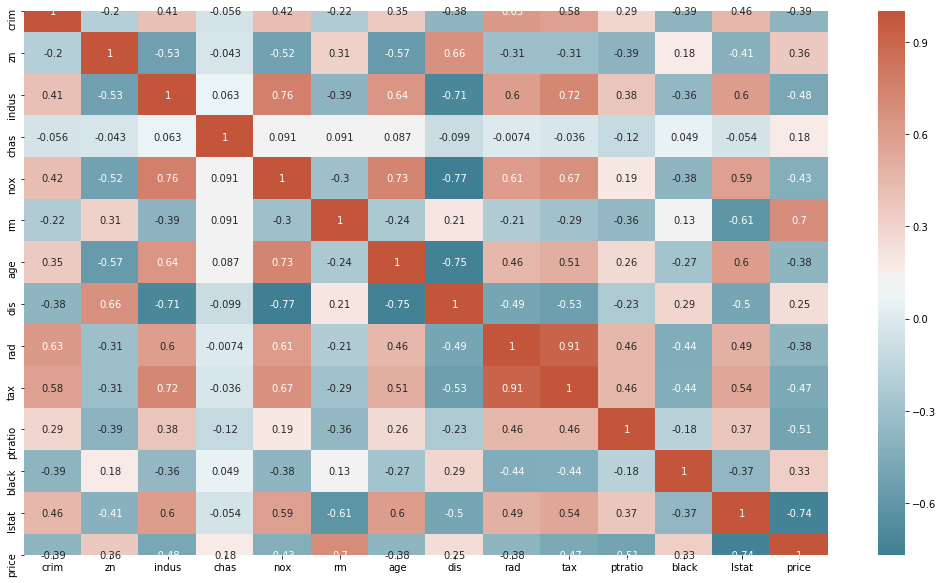

In [9]:
# <<--- Correlation Matrix --->>

corr = df.corr()

plt.subplots(figsize=(18,10))

sns.heatmap(corr, xticklabels=corr.columns,
                yticklabels=corr.columns, annot=True,
                cmap=sns.diverging_palette(220, 20, as_cmap=True))

## Feature Selection 

In [10]:
# Select those features who have correlation with price atleast greater than 0.5 or less than -0.5

filter_mask = ((corr['price'] >= 0.5) | (corr['price'] <= -0.5))
corr[filter_mask]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
ptratio,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787
lstat,0.455621,-0.412995,0.603800,-0.053929,0.590879,-0.613808,0.602339,-0.496996,0.488676,0.543993,0.374044,-0.366087,1.000000,-0.737663
price,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.000000


In [11]:
corr[filter_mask].index

Index(['rm', 'ptratio', 'lstat', 'price'], dtype='object')

In [12]:
final_df = df[['rm', 'ptratio', 'lstat', 'price']]
final_df.head()

,rm,ptratio,lstat,price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


(4.0, 0.0)

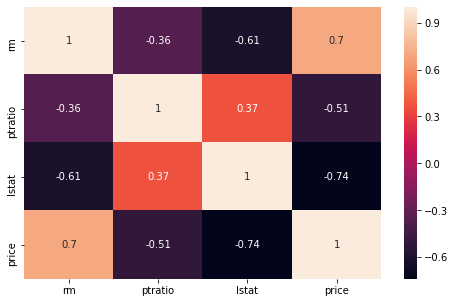

In [13]:
# <<--- Correlation Matrix --->>

corr = final_df.corr()

plt.subplots(figsize=(8,5))

ax = sns.heatmap(corr, annot=True)

# below two lines are just to put the heat map or matrix properly 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Pair Plot

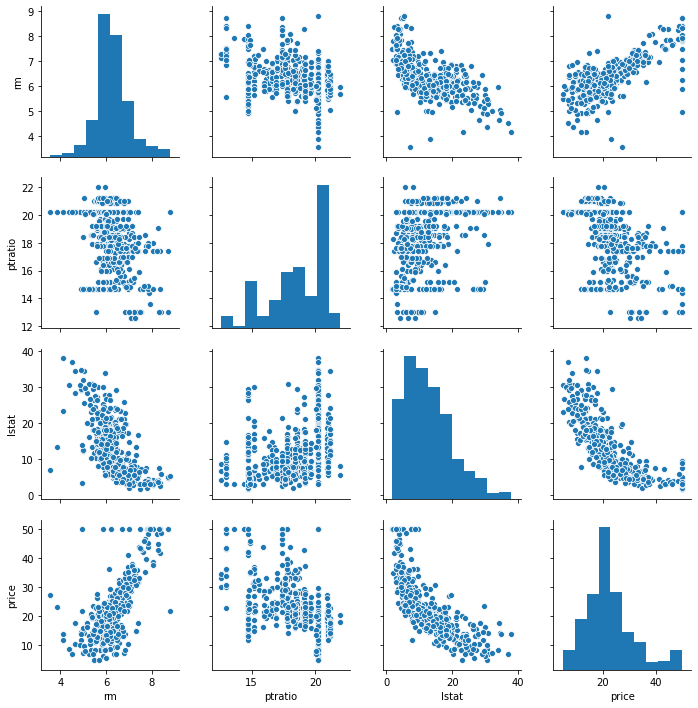

In [14]:
sns.pairplot(final_df)

## Fix Skewed vairables

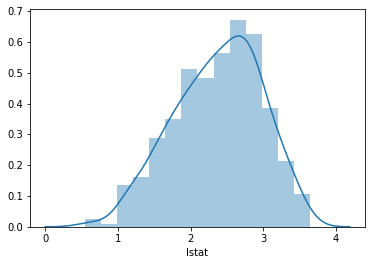

In [15]:
# Fix the skewness of 'lstat' by logging it

final_df['lstat'] = np.log(final_df['lstat'])

sns.distplot(a=final_df['lstat'])

### You see by logging the 'lstat' we get a nice normal distribution.

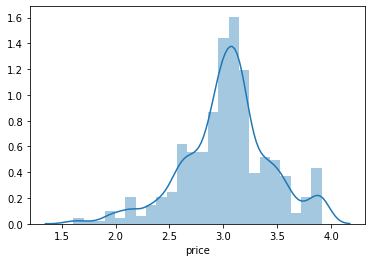

In [16]:
# <<--- Remove the skewness of price by logging it -->>

final_df['price'] = np.log(final_df['price'])

sns.distplot(a=final_df['price'])

### You see by logging the 'price' we get a nice normal distribution.

Text(0.5, 1.0, 'Risudal Plot')

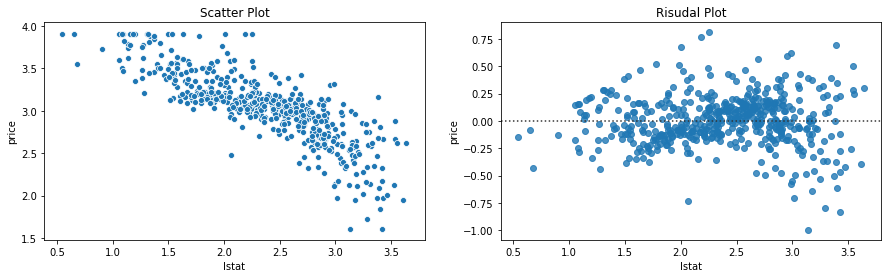

In [17]:
# <<--- Compare lstat and price --->>

fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.scatterplot(x=final_df['lstat'], y=final_df['price'],ax=ax[0])
ax[0].set_title('Scatter Plot')

sns.residplot(x=final_df['lstat'], y=final_df['price'],ax=ax[1])
ax[1].set_title('Risudal Plot')

### You see by logging 'lstat' we get a nice inverse linear relationship between 'lstat' and 'price'.

## Independent and Dependent Variable

In [18]:
X = final_df.iloc[:, :-1].values
Y = final_df.loc[:, 'price'].values

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25)

# IMPORTANT NOTE:- 

### All models will be showing us less R square than expected, because we have logged (natural log) our data. So for example 70% R Square is also considered as good R Square value. 

# Model Making

## 1. Multiple Linear Regression

## F-test

In [20]:
from sklearn.feature_selection import f_regression

f_score, p_value = f_regression(X=x_train, y=y_train)

p_value < 0.05

array([ True,  True,  True])

## T-test

In [21]:
from scipy.stats import ttest_ind

t_score, p_value = ttest_ind(a=x_train, b=y_train)

p_value < 0.05

array([ True,  True,  True])

In [22]:
from sklearn.linear_model import LinearRegression

regressor1 = LinearRegression()
regressor1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
r_square = regressor1.score(x_train, y_train)
print('R Square: ', r_square)

R Square:  0.7052704324204724


In [24]:
# <<<--- K fold cross validation --->>>

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor1, scoring='r2', X = x_train, y = y_train, cv = 10)  # arguments are self explanatory

print("Average R Square: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average R Square: 68.76 %
Standard Deviation: 4.06 %


## 2. Polynomial Regression

In [25]:
# Make a coppy of main data frame

temp_df = final_df

In [26]:
ones = np.ones(temp_df.shape[0])
lstat = temp_df['lstat']
lstat_square = temp_df['lstat']**2
rm = temp_df['rm']
ptratio = temp_df['ptratio']
price = temp_df['price']

temp_df = pd.DataFrame(data=list(zip(ones, lstat, lstat_square, rm, ptratio, price)), columns=['ones', 'lstat', 'lstat_square', 'rm', 'ptratio', 'price'])

In [27]:
temp_df.head()

,ones,lstat,lstat_square,rm,ptratio,price
0,1.0,1.605430,2.577405,6.575,15.3,3.178054
1,1.0,2.212660,4.895866,6.421,17.8,3.072693
2,1.0,1.393766,1.942585,7.185,17.8,3.546740
3,1.0,1.078410,1.162967,6.998,18.7,3.508556
4,1.0,1.673351,2.800104,7.147,18.7,3.589059


In [28]:
temp_x = temp_df.iloc[:, :-1].values
temp_y = temp_df['price'].values

In [29]:
from sklearn.model_selection import train_test_split

temp_x_train, temp_x_test, temp_y_train, temp_y_test = train_test_split(temp_x, temp_y, train_size=0.75, test_size=0.25)

In [30]:
from sklearn.linear_model import LinearRegression

regressor2 = LinearRegression()
regressor2.fit(temp_x_train, temp_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
r_square = regressor2.score(temp_x_train, temp_y_train)
print('R Square: ', r_square)

R Square:  0.7162154600266333


In [32]:
# <<<--- K fold cross validation --->>>

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor2, scoring='r2', X = temp_x_train, y = temp_y_train, cv = 10)  # arguments are self explanatory

print("Average R Square: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average R Square: 68.39 %
Standard Deviation: 10.59 %


## 3. Ridge Regression

In [33]:
from sklearn.linear_model import Ridge

regressor3 = Ridge()
regressor3.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [34]:
# <<--- K fold cross validation --->>

accuracies = cross_val_score(estimator = regressor3, scoring='r2', X = x_train, y = y_train, cv = 10)  # arguments are self explanatory

print("Average R Square: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average R Square: 68.80 %
Standard Deviation: 4.03 %


In [36]:
# <<-- Check the best Ridge Regression Model by parameter tuning -->>

from sklearn.model_selection import GridSearchCV

parameters = [{'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

grid_search = GridSearchCV(estimator = regressor3,
                           param_grid = parameters,
                           scoring = 'r2', 
                           cv = 10,
                           n_jobs = 1)

grid_search = grid_search.fit(x_train, y_train)

best_accuracy = grid_search.best_score_   
best_parameters = grid_search.best_params_  

print("Best R Square: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best R Square: 68.83 %
Best Parameters: {'alpha': 4}


## 4. Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

regressor4 = RandomForestRegressor()
regressor4.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [38]:
# <<--- K fold cross validation --->> Before Parameter Tuning

accuracies = cross_val_score(estimator = regressor4, scoring='r2', X = x_train, y = y_train, cv = 10)  # arguments are self explanatory

print("Average R Square: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average R Square: 67.60 %
Standard Deviation: 9.92 %


In [39]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

In [40]:
# Create the random grid

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [41]:
# <<-- Check the best Random Forest Model by parameter tuning -->>

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = regressor4,
                           param_distributions  = parameters,
                           scoring = 'r2', 
                           cv = 10,
                           n_jobs=1)

random_search = random_search.fit(x_train, y_train)

best_accuracy = random_search.best_score_   
best_parameters = random_search.best_params_  

print("Best R Square: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best R Square: 75.24 %
Best Parameters: {'n_estimators': 1200, 'max_features': 'sqrt', 'max_depth': 5}


In [42]:
# Make new Random Forest model with best parameters

regressor4 = RandomForestRegressor(n_estimators=1200, max_features='sqrt', max_depth=5)
regressor4.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [43]:
# <<--- K fold cross validation --->> After Prameter Tuning

accuracies = cross_val_score(estimator = regressor4, scoring='r2', X = x_train, y = y_train, cv = 10)  # arguments are self explanatory

print("Average R Square: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average R Square: 75.23 %
Standard Deviation: 4.45 %


In [44]:
# Predict test set values

predicted_values = regressor4.predict(x_test)

In [46]:
compare_results_df = pd.DataFrame(data=zip(y_test, predicted_values), columns=['Real Values', 'Predicted Values'])
compare_results_df.head()

,Real Values,Predicted Values
0,2.821379,2.919989
1,3.912023,3.721086
2,2.541602,2.717728
3,3.627004,3.774095
4,3.912023,3.829168


In [47]:
# Rescale the data to natural scale  (Natural Log (e) => 2.718)

y_test = 2.718 ** y_test
predicted_values = 2.718 ** predicted_values

In [49]:
compare_results_df = pd.DataFrame(data=zip(y_test, predicted_values), columns=['Real Values', 'Predicted Values'])
compare_results_df.head()

,Real Values,Predicted Values
0,16.795086,18.535464
1,49.979723,41.293299
2,12.696654,15.141602
3,37.585863,43.541046
4,49.979723,46.005976


In [48]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('MAE:', mean_absolute_error(y_test, predicted_values))
print('MSE:', mean_squared_error(y_test, predicted_values))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predicted_values)))

MAE: 2.4712790526491024
MSE: 14.941884563589113
RMSE: 3.8654733945002278


## 5. XGBoost

In [50]:
!pip install XGBoost

In [51]:
from xgboost import XGBRegressor

regressor5 = XGBRegressor()
regressor5.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [52]:
# <<--- K fold cross validation --->> Before Parameter Tuning

accuracies = cross_val_score(estimator = regressor5, scoring='r2', X = x_train, y = y_train, cv = 10)  # arguments are self explanatory

print("Average R Square: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average R Square: 66.41 %
Standard Deviation: 8.48 %


In [59]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

gamma=[0, 1, 2, 3]

booster = ['gbtree', 'gblinear']

In [60]:
# Create the random grid

parameters = {'n_estimators': n_estimators,
               'gamma': gamma,
               'max_depth': max_depth,
                'booster': booster}

In [61]:
# <<-- Check the best XGBoost Regression Model by parameter tuning -->>

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = regressor5,
                           param_distributions  = parameters,
                           scoring = 'r2', 
                           cv = 10,
                           n_jobs=1)

random_search = random_search.fit(x_train, y_train)

best_accuracy = random_search.best_score_   
best_parameters = random_search.best_params_  

print("Best R Square: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

[11:08:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:08:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  pa

[11:08:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:08:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  pa

[11:08:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:08:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  pa

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best R Square: 72.04 %
Best Parameters: {'n_estimators': 1100, 'max_depth': 25, 'gamma': 1, 'booster': 'gbtree'}


In [62]:
# Make new XGBoost model with best parameters

regressor5 = XGBRegressor(n_estimators=1100, max_depth=25, gamma=1, booster='gbtree')
regressor5.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=25,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [63]:
# <<--- K fold cross validation --->> After Parameter Tuning

accuracies = cross_val_score(estimator = regressor5, scoring='r2', X = x_train, y = y_train, cv = 10)  # arguments are self explanatory

print("Average R Square: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average R Square: 72.07 %
Standard Deviation: 3.99 %


In [64]:
# Predict test values

predicted_values = regressor5.predict(x_test)

In [67]:
compare_results_df = pd.DataFrame(data=zip(y_test, 2.718**predicted_values), columns=['Real Values', 'Predicted Values'])
compare_results_df.head()

,Real Values,Predicted Values
0,16.795086,19.045921
1,49.979723,37.008907
2,12.696654,16.623539
3,37.585863,39.343349
4,49.979723,39.343349


In [68]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('MAE:', mean_absolute_error(y_test, predicted_values))
print('MSE:', mean_squared_error(y_test, predicted_values))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predicted_values)))

MAE: 18.71667027780827
MSE: 422.3496255466256
RMSE: 20.551146574987627


# NOTE:- 

## Random Forest gives us best results.

# Save Model

In [69]:
import pickle

with open('Model.txt','wb') as f:
    pickle.dump(regressor4, f)